# 데이터분석방법론2 - 제7강 과제

### 학    번 : 201685-010100
###  성    명 : 지 용 기
###  연 락 처 : 010-9828-0332, braveji@hanmail.net
---

## 문제 5.18> 중국에서 흡연과 폐암관의 관계에 대한 8개의 연구 결과를 정리한 것이다.

In [5]:
library(dplyr)


Attaching package: 'dplyr'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
smoking <- read.csv( 'chap07_report_01.csv', head=T )
smoking
smoking_all <- mutate( smoking,  total= lung_cancer+health  ) 
head( smoking_all )

,city,smoking,lung_cancer,health
1,Beijing,y,126,100
2,Beijing,n,35,61
3,Shanghai,y,908,688
4,Shanghai,n,497,807
5,Shenyang,y,913,747
6,Shenyang,n,336,598
7,Nanjing,y,235,172
8,Nanjing,n,58,121
9,Harbin,y,402,308
10,Harbin,n,121,215


,city,smoking,lung_cancer,health,total
1,Beijing,y,126,100,226
2,Beijing,n,35,61,96
3,Shanghai,y,908,688,1596
4,Shanghai,n,497,807,1304
5,Shenyang,y,913,747,1660
6,Shenyang,n,336,598,934


### a. 흡연 여부와 도시를 예측변수로 사용하여 로지스틱 회귀모형을 적합하고 흡연의 효과를 해석하라.

In [35]:
smoking.glm <- glm( lung_cancer/total ~ city + smoking, weights=total,  family=binomial(link="logit"), data=smoking_all )
summary( smoking.glm  )


Call:
glm(formula = lung_cancer/total ~ city + smoking, family = binomial(link = "logit"), 
    data = smoking_all, weights = total)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.21781  -0.14842  -0.00012   0.16817   1.35470  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.548682   0.118022  -4.649 3.34e-06 ***
cityHarbin     0.018187   0.129473   0.140    0.888    
cityNanchang  -0.054906   0.170996  -0.321    0.748    
cityNanjing    0.005764   0.140911   0.041    0.967    
cityShanghai   0.055618   0.119570   0.465    0.642    
cityShenyang  -0.027739   0.120071  -0.231    0.817    
cityTaiyuan   -0.745683   0.185519  -4.019 5.83e-05 ***
cityZhengzhou  0.028782   0.144755   0.199    0.842    
smokingy       0.777062   0.046775  16.613  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 310.8951  on 15  degre

**해석 **

- **city변수들중에서 베이징과 다른 도시와는 차이가 없었지만, 베이징과 타이위엔과는 유의미한 차이가 발생하고 있으면,  e ^ ( -0.745683     ) =  0.47,   베이징보다 타이위엔이 페암발생 오즈가 0.47배 낮음.**
- **흡연변수는 흡연과 비흡연과는 유의미한 차이가 있으며,  흡연시 e ^ ( 0.777062 ) =  2.175,  비흡연보다 오즈가 2.175배 높음.**

In [13]:
exp ( 0.777062     )

[1] 2.175073

### b. Pearson 적합도 검정을 하고 결과를 해석하라.

In [36]:
smoking.glm.0 <- glm( lung_cancer/total ~ 1, weights=total,  family=binomial(link="logit"), data=smoking_all )

anova(smoking.glm.0  , smoking.glm,  test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
1,15,310.8951,NA,NA,NA
2,7,5.195802,8,305.6993,2.520176e-61


** 해석 **

- ** null 모델과 카이제곱 검정을 통해서 Null 모델과 city + smoking 예측변수를 이용한 모델이 유의미한 차이가 있다고 할 수 있음. **

### c. 잔차를 이용해 적합도의 정도를 분석하고 결과를 해석하라.

In [25]:
h <- lm.influence(smoking.glm)$hat
smoking.glm.spr <- round(residuals(smoking.glm, type="pearson")/sqrt(1-h),2)
sum(  abs( smoking.glm.spr) > 2  )
sum(  abs( smoking.glm.spr) > 3  )

[1] 0

[1] 0

** 표준화잔차 값이 2 또는 3 보다 큰값이 없으므로, 특정 관측값이 모형적합에 미치는 잠재적인 영향력이 크지 않고 모형이 적합하다고 할 수 있음. **

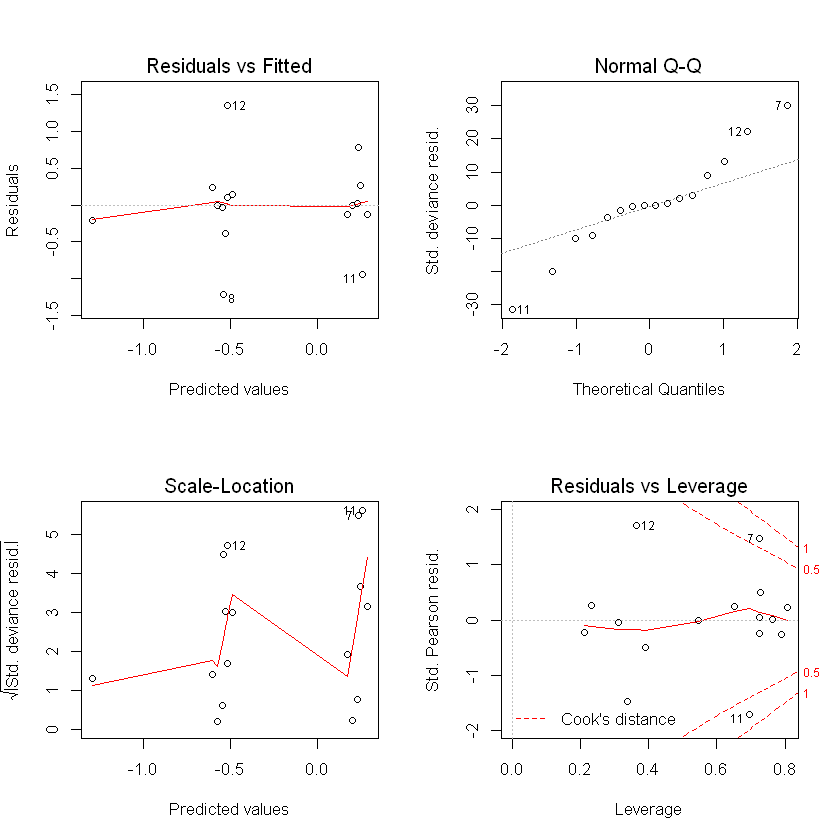

In [29]:
par(mfrow = c(2, 2))
plot( smoking.glm )
par(mfrow = c(1, 1))

** 잔차들의 분포가 정규분포를 따르지 않으므로, 만들어진 모형이 아주 적합하다고 말할수 없음  **

## 문제 6.2> 6.1.2 절에 악어 먹이 선택의 예제를 참조하라.

In [34]:
crocodile <- read.csv( 'chap07_report_02.csv', head=T )
head( crocodile )
summary( crocodile )

,length,feed
1,1.24,I
2,1.45,I
3,1.65,I
4,1.78,I
5,1.98,I
6,2.36,I


     length      feed  
 Min.   :1.240   F:37  
 1st Qu.:1.575   I:22  
 Median :1.850   O: 8  
 Mean   :2.117         
 3rd Qu.:2.440         
 Max.   :3.890         

### a. 모형의 적합된 결과로부터, “연체류”나 “기타”를 주요 먹이로 선택하는 데 영향을 미치는 길이의 추정 효과를 나타내는 오즈비를 계산하라.

In [48]:
crocodile$feed2 <- relevel(crocodile$feed, ref = "O")

In [50]:
library("nnet")
crocodile.multinom <- multinom(feed2 ~ length, data = crocodile )
summary( crocodile.multinom )

# weights:  9 (4 variable)
initial  value 73.607023 
iter  10 value 56.022415
final  value 56.022402 
converged


Call:
multinom(formula = feed2 ~ length, data = crocodile)

Coefficients:
  (Intercept)    length
F    2.485519 -0.398613
I    5.586396 -2.277108

Std. Errors:
  (Intercept)    length
F    1.304909 0.5047560
I    1.670641 0.7915035

Residual Deviance: 112.0448 
AIC: 120.0448 

- log(  I   /  O  ) =  -0.398613 + ( -2.277108 ) length 
- exp(  -2.277108 ) = 0.102,  길이가 1 단위증가할수록,  연체류일 오즈값은  0.102 배로 줄어듬.

In [51]:
exp(  -2.277108 ) 

[1] 0.1025804

### b. 길이가 3.9미터인 악어가 “연체류”를 먹이로 선택할 확률을 추정하라.

 - exp(  5.586396 - 2.277108 * 3.9 )  / ( exp(  2.485519  - 0.398613 * 3.9 ) * exp(  5.586396 - 2.277108 * 3.9 ) ) =  0.394187616111204

In [54]:
exp(  5.586396 - 2.277108 * 3.9 )  / ( exp(  2.485519  - 0.398613 * 3.9 ) * exp(  5.586396 - 2.277108 * 3.9 ) ) 

[1] 0.3941876

### c. “연체류”와 “기타”를 선택할 확률들이 서로 같게 되는 길이를 구하라.

- length = - alpha / beta  이므로 
-  5.586396 /  2.277108 =  2.4M 이며 서로 같게 됨

In [55]:
5.586396 / 2.277108 

[1] 2.453285